In [15]:
import torch
import torchvision
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, datasets
from sklearn.metrics import classification_report

In [17]:
train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                      #transforms.RandomResizedCrop(224),
                                      transforms.RandomHorizontalFlip(),
                                      #transforms.functional.rgb_to_grayscale,
                                      transforms.ToTensor()])

test_transforms = transforms.Compose([transforms.RandomRotation(30),
                                     #transforms.RandomResizedCrop(224),
                                     #transforms.functional.rgb_to_grayscale,
                                     transforms.ToTensor()])


train_data = datasets.ImageFolder('/home/farah.alharthi/ml_lab/trimmed/train_', transform=train_transforms)
test_data = datasets.ImageFolder('/home/farah.alharthi/ml_lab/trimmed/test_', transform=test_transforms)

trainset = torch.utils.data.DataLoader(train_data, batch_size=16, shuffle=True)
testset = torch.utils.data.DataLoader(test_data, batch_size=16, shuffle=True)

In [18]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(3*128*128, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 16)
        self.fc4 = nn.Linear(16, 3)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim=1)

model = NeuralNetwork()
model.load_state_dict(torch.load('/home/farah.alharthi/ml_lab/params.pth'))

<All keys matched successfully>

In [19]:
for i in model.fc1.parameters():
    print (i)

Parameter containing:
tensor([[ 0.0012,  0.0022,  0.0020,  ..., -0.0003,  0.0003, -0.0017],
        [ 0.0026, -0.0029,  0.0043,  ...,  0.0034,  0.0028,  0.0021],
        [-0.0266, -0.0528, -0.0397,  ...,  0.0686,  0.0432, -0.0268],
        ...,
        [-0.0006,  0.0040, -0.0001,  ..., -0.0032,  0.0044,  0.0013],
        [-0.0012,  0.0033, -0.0003,  ..., -0.0025, -0.0032,  0.0004],
        [-0.0015, -0.0033, -0.0004,  ...,  0.0003,  0.0035, -0.0004]],
       requires_grad=True)
Parameter containing:
tensor([-0.0049, -0.0098, -0.1409, -0.0062, -0.0011, -0.0054, -0.0313, -0.0045,
        -0.0097, -0.0031,  0.1337,  0.0863, -0.0068,  0.1115, -0.0040, -0.0039,
        -0.0057, -0.0071,  0.0064, -0.0063, -0.0070,  0.1456, -0.0036, -0.0100,
        -0.0095, -0.1394, -0.0032, -0.0055, -0.1807, -0.1854, -0.0084, -0.1679,
         0.2149, -0.0086, -0.1417,  0.0374,  0.0553, -0.1754,  0.1714, -0.1475,
        -0.0095, -0.1823,  0.1377,  0.0099, -0.0021, -0.0088, -0.1723, -0.0093,
        -0.0066

In [20]:
for i in model.fc3.parameters():
    print (i)

Parameter containing:
tensor([[-3.9399e-02,  6.7419e-02,  8.2065e-02,  1.2554e-01, -1.0465e-01,
          7.7887e-02, -2.1738e-02, -1.2238e-01,  6.5199e-02, -1.7431e-01,
         -6.0504e-02, -9.6493e-04, -1.2464e-01,  1.5060e-01, -1.5149e-01,
         -4.9793e-02, -1.3494e-01, -2.1077e-01,  2.8889e-02,  1.3130e-01,
         -6.3313e-04, -6.2636e-02, -1.7999e-01,  1.0589e-01, -1.9859e-01,
         -1.8639e-01,  1.1841e-01,  1.4264e-01,  5.1851e-02,  1.5564e-01,
         -3.7224e-02, -1.3029e-01],
        [-1.4451e-01,  1.5787e-01, -1.1514e-01, -5.9928e-02, -1.6407e-01,
         -1.8851e-01, -1.9855e-01,  4.7488e-02,  1.7197e-02, -1.9738e-01,
          7.2567e-02,  1.3962e-01,  1.2751e-01, -1.0649e-01, -1.5342e-01,
         -5.6776e-02,  2.6497e-02, -7.0427e-02,  7.2841e-02, -2.3545e-02,
          1.2034e-01, -4.3411e-02, -2.4924e-02, -1.3215e-01,  7.7047e-02,
         -5.5362e-02,  1.4817e-01,  1.0826e-01,  1.6514e-01, -6.0502e-02,
         -2.5259e-02,  4.0543e-02],
        [-1.7290e-

In [21]:
## freeze the layers
for param in model.fc1.parameters():
    param.requires_grad = False
    
for param in model.fc2.parameters():
    param.requires_grad = False    

In [22]:
optimizer = optim.Adam(model.parameters(), lr=0.001)
EPOCHS = 3
for epoch in range(EPOCHS):
    for data in trainset:
        X, y = data
        model.zero_grad()
        # to reset the gradients of model parameters;
        # gradients by default add up; to prevent double-counting, we explicitly zero them at each iteration.
        output = model(X.view(-1,3*128*128))
        #flatten image to one dimensional array
#-------------------------------------------------------------------
        loss = F.nll_loss(output, y)
        #The negative log likelihood loss.
        loss.backward()
        #Backpropagate the prediction loss 
        #PyTorch assign the gradients of the loss to each parameter.
        optimizer.step()
        #adjust the parameters by the gradients collected in the backward pass.
        
    print(loss)

tensor(0.2614, grad_fn=<NllLossBackward0>)
tensor(0.5404, grad_fn=<NllLossBackward0>)
tensor(0.4262, grad_fn=<NllLossBackward0>)


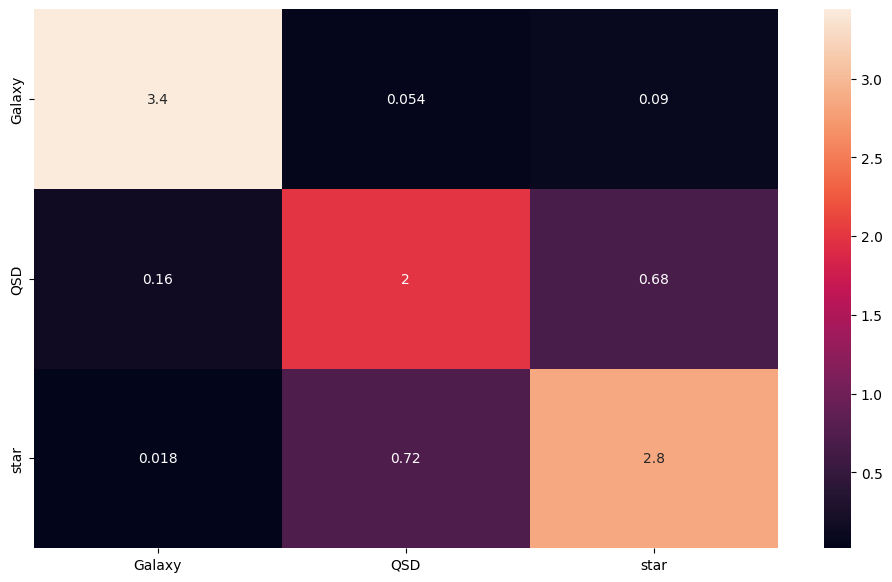

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import numpy as np

y_pred = []
y_true = []
correct = 0
total = 0

# iterate over test data
for inputs, labels in testset:
        output = model(inputs.view(-1, 3*128 * 128)) # Feed Network with flatten x

        output = (torch.max(torch.exp(output), 1)[1]).data.cpu().numpy()
        # output of nn is batchsize*number of classes, we want only the highest valued class for each data(row)
        y_pred.extend(output) # Save Prediction
        
        labels = labels.data.cpu().numpy()
        y_true.extend(labels) # Save Truth
    
# constant for classes
classes = ('Galaxy', 'QSD', 'star')

# Build confusion matrix
cf_matrix = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cf_matrix/np.sum(cf_matrix) *10, index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (12,7))
sn.heatmap(df_cm, annot=True)
plt.savefig('output.png')

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred, target_names=classes))

              precision    recall  f1-score   support

      Galaxy       0.95      0.96      0.96       200
         QSD       0.72      0.70      0.71       158
        star       0.79      0.80      0.79       200

    accuracy                           0.83       558
   macro avg       0.82      0.82      0.82       558
weighted avg       0.83      0.83      0.83       558



In [25]:
#since this layer was frozen, it hasnt changed
for i in model.fc1.parameters():
    print (i)

Parameter containing:
tensor([[ 0.0012,  0.0022,  0.0020,  ..., -0.0003,  0.0003, -0.0017],
        [ 0.0026, -0.0029,  0.0043,  ...,  0.0034,  0.0028,  0.0021],
        [-0.0266, -0.0528, -0.0397,  ...,  0.0686,  0.0432, -0.0268],
        ...,
        [-0.0006,  0.0040, -0.0001,  ..., -0.0032,  0.0044,  0.0013],
        [-0.0012,  0.0033, -0.0003,  ..., -0.0025, -0.0032,  0.0004],
        [-0.0015, -0.0033, -0.0004,  ...,  0.0003,  0.0035, -0.0004]])
Parameter containing:
tensor([-0.0049, -0.0098, -0.1409, -0.0062, -0.0011, -0.0054, -0.0313, -0.0045,
        -0.0097, -0.0031,  0.1337,  0.0863, -0.0068,  0.1115, -0.0040, -0.0039,
        -0.0057, -0.0071,  0.0064, -0.0063, -0.0070,  0.1456, -0.0036, -0.0100,
        -0.0095, -0.1394, -0.0032, -0.0055, -0.1807, -0.1854, -0.0084, -0.1679,
         0.2149, -0.0086, -0.1417,  0.0374,  0.0553, -0.1754,  0.1714, -0.1475,
        -0.0095, -0.1823,  0.1377,  0.0099, -0.0021, -0.0088, -0.1723, -0.0093,
        -0.0066, -0.0084,  0.0897, -0.0102

In [26]:
#this layer wasnt frozen so its different after running the algorthim
for i in model.fc3.parameters():
    print (i)

Parameter containing:
tensor([[-3.9399e-02,  6.7419e-02,  7.2889e-02,  1.2554e-01, -1.2720e-01,
          7.7887e-02, -3.7368e-02, -1.2238e-01,  6.5199e-02, -1.8339e-01,
         -6.0504e-02, -1.8808e-02, -1.2464e-01,  1.2676e-01, -1.5149e-01,
         -6.9160e-02, -1.3494e-01, -2.1077e-01,  2.8889e-02,  1.3130e-01,
         -6.3313e-04, -1.0044e-01, -2.0156e-01,  1.0589e-01, -2.2335e-01,
         -1.8639e-01,  1.0999e-01,  1.4264e-01,  5.1851e-02,  1.3498e-01,
         -3.7224e-02, -1.4040e-01],
        [-1.4451e-01,  1.5787e-01, -1.1514e-01, -5.9928e-02, -1.6407e-01,
         -1.8851e-01, -1.9855e-01,  4.7488e-02,  1.7197e-02, -1.9738e-01,
          7.2567e-02,  1.3962e-01,  1.2751e-01, -1.0649e-01, -1.5342e-01,
         -5.6776e-02,  2.6497e-02, -7.0427e-02,  7.2841e-02, -2.3545e-02,
          1.2034e-01, -4.3411e-02, -2.4924e-02, -1.3215e-01,  7.7047e-02,
         -5.5362e-02,  1.4817e-01,  1.0826e-01,  1.6514e-01, -6.0502e-02,
         -2.5259e-02,  4.0543e-02],
        [-1.5921e-